# Color Detection

### Goal
Remove background color of the container. 

### Methodology
* Create a boolean mask that detects color coordinates in a range.
* Apply the mask to the image.

In [1]:
# All imports go here
import cv2
import numpy as np
import os  
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
def apply_color_filer(img_path):
    '''Filter an image by color'''
    img = cv2.imread(img_path)

    # convert BGR to RGB and then to HSV
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    hsv = cv2.cvtColor(rgb_img, cv2.COLOR_BGR2HSV)

    # define range of blue color in HSV
    lower = np.array([110,50,50])
    upper = np.array([130,255,255])

    # threshold the HSV image to get only colors in range
    mask = cv2.inRange(hsv, lower, upper)

    # bitwise-AND mask and original image
    res = cv2.bitwise_and(rgb_img, rgb_img, mask= mask)
    return rgb_img, mask, res

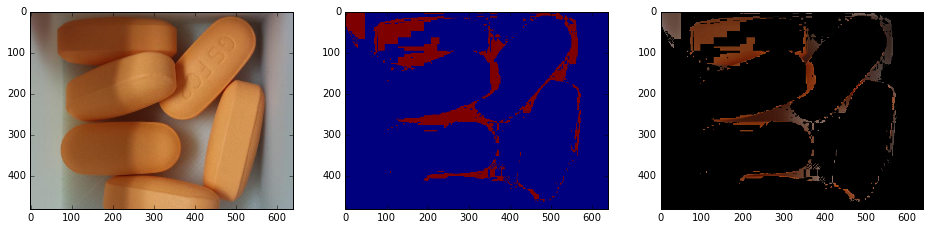

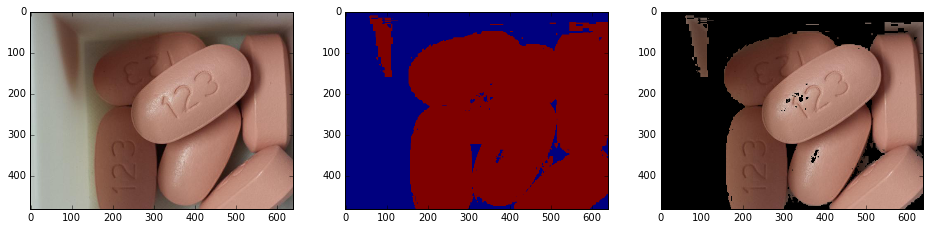

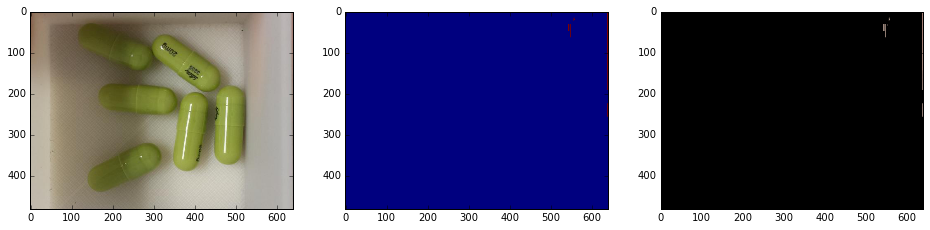

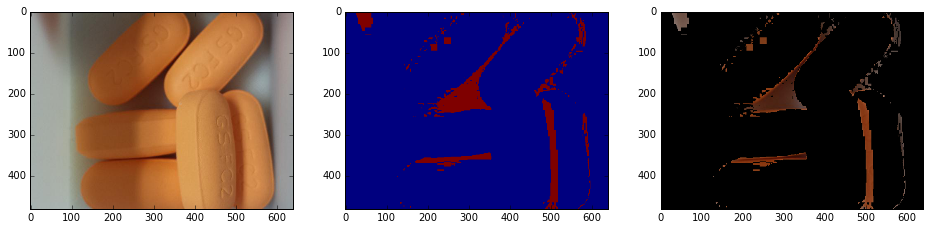

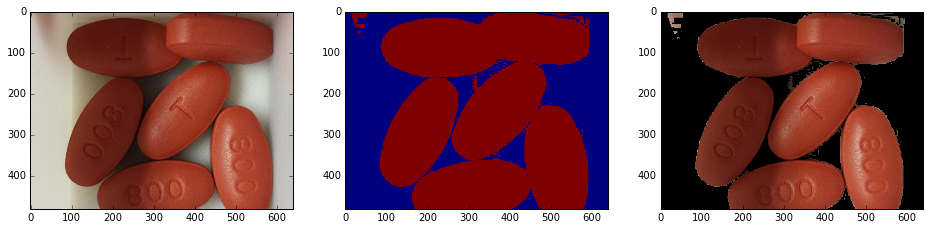

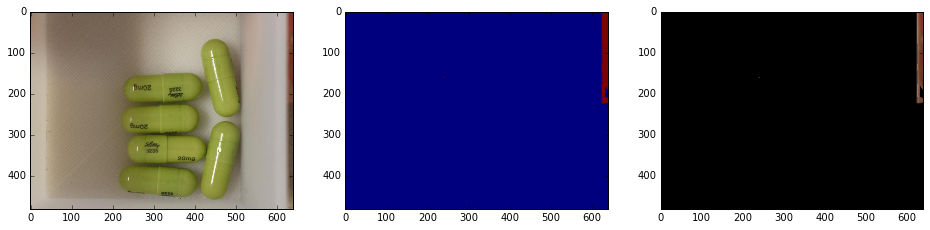

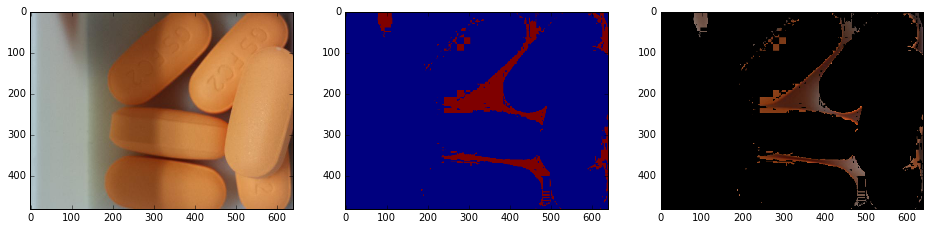

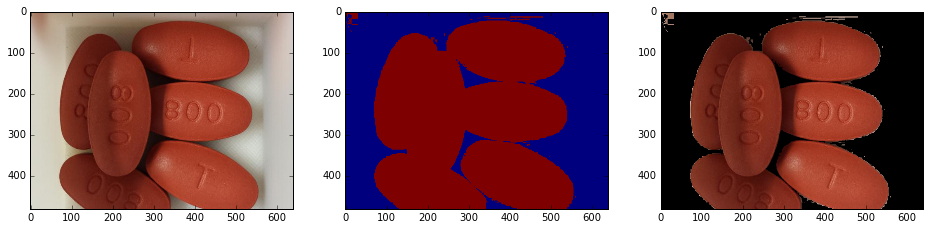

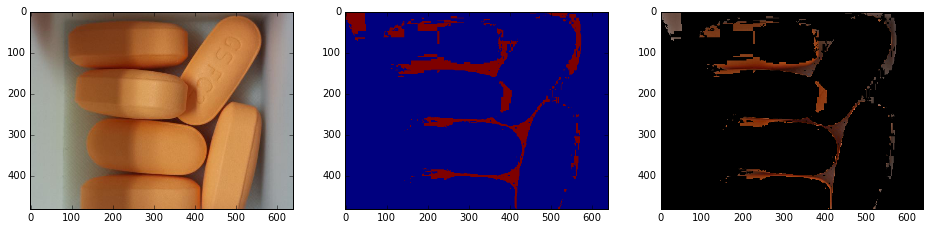

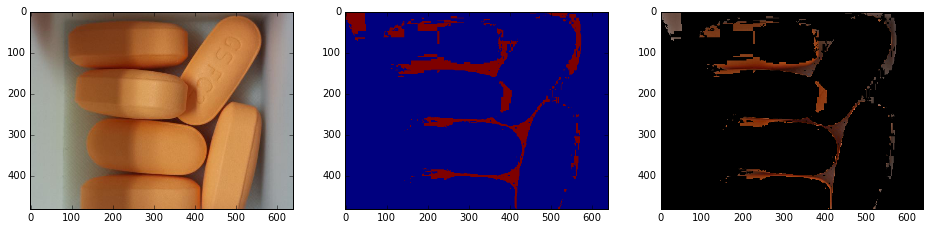

In [3]:
# Main method

PHOTOS_PATH = 'photos/' 
NUM_PHOTOS = 10 # number of photos to test on

# get random imgage names
img_names = np.random.choice(os.listdir(PHOTOS_PATH), NUM_PHOTOS)

# filter and plot photos
for fn in img_names: 
    img, mask, res = apply_color_filer(PHOTOS_PATH + fn)
    fig = plt.figure(figsize=(16,4))
    plt.subplot(131), plt.imshow(img)
    plt.subplot(132), plt.imshow(mask)
    plt.subplot(133), plt.imshow(res)

plt.show()